In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from pandas_profiling import ProfileReport

In [2]:
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification

In [4]:
wine = load_wine()
wine_df = pd.DataFrame(wine['data'], columns=wine['feature_names'])
wine_df['class'] = wine['target']
wine_df['class_name'] = wine_df['class'].map(dict(zip([0, 1, 2], wine['target_names'])))
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,class_name
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


<AxesSubplot:ylabel='color_intensity'>

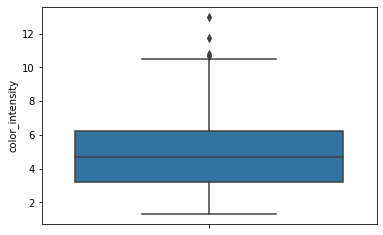

In [6]:
sns.boxplot(data=wine_df, y='color_intensity', whis=1.5)

<AxesSubplot:>

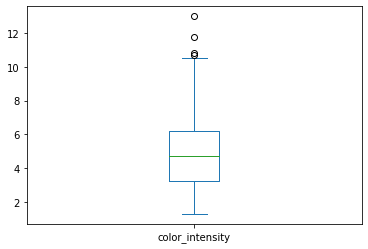

In [7]:
wine_df['color_intensity'].plot.box()

In [8]:
quartile_1, quartile_3 = np.percentile(wine_df['color_intensity'], [25, 75])
iqr = quartile_3 - quartile_1
upper_whis = quartile_3 + (iqr * 1.5)
lower_whis = quartile_1 - (iqr * 1.5)
upper_whis, lower_whis

(10.670000000000002, -1.2500000000000009)

<AxesSubplot:>

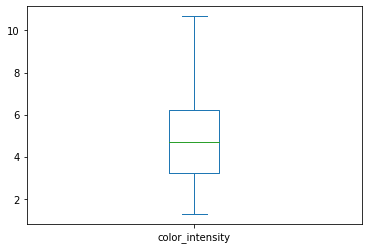

In [10]:
wine_df['color_intensity'].clip(upper=upper_whis, lower=lower_whis).plot.box()

In [15]:
def outliers_iqr(df, col):
    quartile_1, quartile_3 = np.percentile(df[col], [25, 75])
    iqr = quartile_3 - quartile_1
    upper_whis = quartile_3 + (iqr * 1.5)
    lower_whis = quartile_1 - (iqr * 1.5)
    outliers_df = df[(df[col] > upper_whis) | (df[col] < lower_whis)]
    return outliers_df[[col]]

In [16]:
outliers_iqr(wine_df, 'color_intensity')

,color_intensity
151,10.80
158,13.00
159,11.75
166,10.68
